In [130]:
import pandas as pd
import numpy as np
from ofxparse import OfxParser
import matplotlib.pyplot as plt
import os
from ast import literal_eval
from datetime import datetime

# load in the data
df = pd.read_pickle("transactions.pkl")
# df = df[df.description!="xxx"]

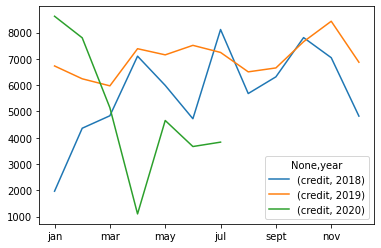

In [23]:
# transactions by month
dff = df[~(df.credit == 0)][['date', 'year', 'month', 'credit']]
monthly_transactions = dff.groupby(['month', 'year']).sum().unstack()
monthly_transactions.index = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']
monthly_transactions.plot()
plt.savefig("figures/sum_trans_by_month.png")
plt.show()

<Figure size 1008x576 with 0 Axes>

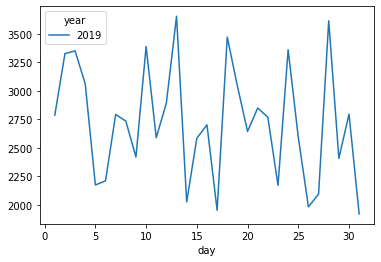

In [24]:
# transactions by days
plt.figure(figsize=(14,8))
dff = df[~(df.credit == 0) & (df.year==2019)][['date', 'year', 'day', 'month', 'credit']]
daily_transactions = dff.groupby(['day', 'year']).sum().unstack()['credit'].plot()
# daily_transactions.plot()
# plt.xticks([i for i in range(1, 31)])
# plt.show()

In [25]:
temp = df.drop(df[df.credit == 3000].index, axis=0)
print(temp[(temp.month == 7) & (temp.year == 2020)].sum()['credit'])
print(df[(df.month == 7) & (df.year == 2020)].sum()['credit'])

3832.5
3832.5


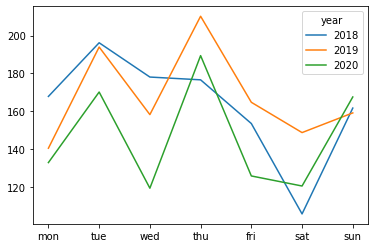

In [26]:
# transactions by weekdays
x = df.groupby(['weekdays', 'year'])['credit'].mean().unstack()
x.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
x.plot()
plt.savefig("figures/avg_transaction_by_day.png")
plt.show()